In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
import seaborn as sns

In [2]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2") # this is the same tokenizer that openai uses for their instructGPT model family

In [3]:
path_to_data = "./datasets/kleister_charity/train/in.tsv"
path_to_headers = "./datasets/kleister_charity/in-header.tsv"

data = pd.read_csv(path_to_data, sep="\t", header=None)
headers = pd.read_csv(path_to_headers, sep="\t", header=None)
data.columns = headers.iloc[0]
data = data.drop(columns=["text_djvu", "text_tesseract", "text_textract"])
data.iloc[0]["text_best"]

"TAR\\n1\\nAugust 2016\\nTrustees' Annual Report for the period\\nFrom\\nPeriod start date\\nTo\\nPeriod end date\\n30\\n04\\n2015\\n29\\n04\\n2016\\nSection A\\nReference and administration details\\nCharity name\\nPC Nicola Hughes Memorial Fund\\nOther names charity is known by\\nRegistered charity number (if any) 1156398\\nCharity's principal address Unit 1, Block B, Gatehead business Park\\nDelph New Road\\nOldham\\nPostcode\\nOL3 5DE\\nNames of the charity trustees who manage the charity\\nTrustee name\\nOffice (if any)\\nDates acted if not for whole\\nyear\\nName of person (or body) entitled\\nto appoint trustee (if any)\\n1 Bryndon Hughes Chair\\n2\\n3\\n4\\n5\\n6\\n7\\n8\\n9\\n10\\n11\\n12\\n13\\n14\\n15\\n16\\n17\\nNames of the trustees for the charity, if any, (for example, any custodian trustees)\\nName\\nDates acted if not for whole year\\nRichard Bartlett\\nMark Brook\\nTAR\\n2\\nAugust 2016\\nNames and addresses of advisers (Optional information)\\nType of adviser\\nName\

In [4]:
data.head()

,filename,keys,text_best
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...
2,01c7fd563327947c68abdd9717ef228d.pdf,address__post_town address__postcode address__...,54 S ke *\nB\n \nWelcome to our Annual\nReport...
3,01d804edf76bec4912d2466908a60889.pdf,address__post_town address__postcode address__...,Annual Repor t 8\nAccounts 2017/18\nYear ended...
4,01e4461b059e707b7d8276b3d2b80b71.pdf,address__post_town address__postcode address__...,"The Greenway Centre\n(Registered charity, numb..."


In [5]:
len(data)

1729

Let's look at the gold keys that we should find in any given document. Although note that some documents don't contain answers to all of the keys, in which case it's correct to simply leave them out.

In [6]:
data.iloc[0]["keys"]

'address__post_town address__postcode address__street_line charity_name charity_number income_annually_in_british_pounds report_date spending_annually_in_british_pounds'

Let's look at how many tokens are in a given document and save it in the dataframe.

In [7]:
data["text_best_number_of_tokens"] = data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (3545 > 1024). Running this sequence through the model will result in indexing errors


In [8]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,3545
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1799
2,01c7fd563327947c68abdd9717ef228d.pdf,address__post_town address__postcode address__...,54 S ke *\nB\n \nWelcome to our Annual\nReport...,31931
3,01d804edf76bec4912d2466908a60889.pdf,address__post_town address__postcode address__...,Annual Repor t 8\nAccounts 2017/18\nYear ended...,45313
4,01e4461b059e707b7d8276b3d2b80b71.pdf,address__post_town address__postcode address__...,"The Greenway Centre\n(Registered charity, numb...",2896


In [9]:
data["text_best_number_of_tokens"].describe()

count     1729.000000
mean     11057.423366
std      10641.796009
min        414.000000
25%       3939.000000
50%       6765.000000
75%      14479.000000
max      87904.000000
Name: text_best_number_of_tokens, dtype: float64

Let's look closer at the distribution of the number of tokens.

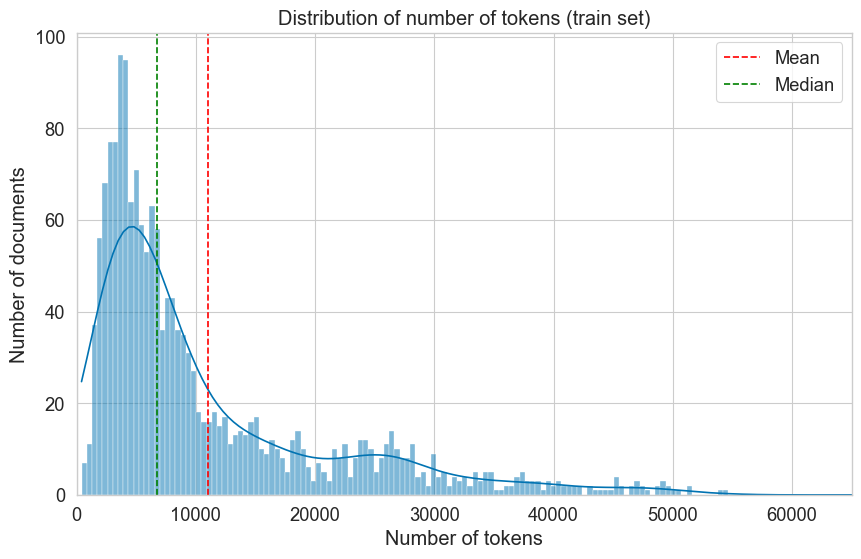

In [25]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x=data["text_best_number_of_tokens"], kde=True, ax=ax, bins=200)
ax.set_title("Distribution of number of tokens (train set)")
ax.set_xlabel("Number of tokens")
ax.set_ylabel("Number of documents")
ax.axvline(data["text_best_number_of_tokens"].mean(), color="red", linestyle="--", label="Mean")
ax.axvline(data["text_best_number_of_tokens"].median(), color="green", linestyle="--", label="Median")

ax.legend()
ax.set_xlim(0, 65000)

plt.show()
fig.savefig("plots/token_distribution_zoom_train.png", dpi=300)

Let's look at the shortest document to get a better idea of what the input text looks like.

In [12]:
shortest = data[data["text_best"].apply(lambda x: len(tokenizer(x)["input_ids"])) == data["text_best_number_of_tokens"].min()]["text_best"].values[0]
shortest

"Ushaw Moor Pre-school/Childcare\\nDurham Road\\nUshaw Moor\\nDurham\\nDH7 7LF\\nTelephone 01913737536\\nAnnual General Meeting\\nOctober\\nAttending meeting: Catherine Winn, Julie Davison, Lindsley Davison, Deborah\\nMellis, Megan Bowery, Nikki Lowerson, Karen Smith, Janice Laight,\\nKayleigh Hughes, Abbie Syers\\nApologies from Lynsey Everett.\\nUp date on school situation:\\nMr Truman has left the school after a along absent, and a new head is now in\\nposition, Mrs Maughan has had a chat with Julie, and the girls from the pre-\\nschool are more optimistic with the future links between us. As the school have\\na new head they will be due an ofsted and Mrs Maughan has put this as her\\npriority but has already invited our children to attend their Christmas\\nactivities.\\nOther ideas included: Stay and play days, with parents and shared outdoor\\nactivities.\\nPre-School:\\nKaren reported the pre-school had now used up all their childcare spaces and\\nwould not be taking any Septembe

We can see that the text contains double escapes for the newline character, i.e. `\\n` instead of `\n`. This also leads to the fact that the string is not represented correctly when printing it.

In [13]:
shortest = shortest.replace("\\n", "\n")
print(shortest)

Ushaw Moor Pre-school/Childcare
Durham Road
Ushaw Moor
Durham
DH7 7LF
Telephone 01913737536
Annual General Meeting
October
Attending meeting: Catherine Winn, Julie Davison, Lindsley Davison, Deborah
Mellis, Megan Bowery, Nikki Lowerson, Karen Smith, Janice Laight,
Kayleigh Hughes, Abbie Syers
Apologies from Lynsey Everett.
Up date on school situation:
Mr Truman has left the school after a along absent, and a new head is now in
position, Mrs Maughan has had a chat with Julie, and the girls from the pre-
school are more optimistic with the future links between us. As the school have
a new head they will be due an ofsted and Mrs Maughan has put this as her
priority but has already invited our children to attend their Christmas
activities.
Other ideas included: Stay and play days, with parents and shared outdoor
activities.
Pre-School:
Karen reported the pre-school had now used up all their childcare spaces and
would not be taking any September starters from the childcare setting. As the
p

This looks much better. Let's do it for all rows and also for other control characters. Let's also remove redundant spaces.

In [14]:
data["text_best_cleaned"] = data["text_best"].apply(lambda x: x.replace("\\n", "\n").replace("\\t", "\t").replace("\\r", "\r").replace("\\", "").replace("  ", " "))

Let's also save the number of tokens of the cleaned text.

In [15]:
data["text_best_cleaned_number_of_tokens"] = data["text_best_cleaned"].apply(lambda x: len(tokenizer(x)["input_ids"]))

In [16]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,3545,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,2981
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1799,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1662
2,01c7fd563327947c68abdd9717ef228d.pdf,address__post_town address__postcode address__...,54 S ke *\nB\n \nWelcome to our Annual\nReport...,31931,54 S ke *\nB\n \nWelcome to our Annual\nReport...,29323
3,01d804edf76bec4912d2466908a60889.pdf,address__post_town address__postcode address__...,Annual Repor t 8\nAccounts 2017/18\nYear ended...,45313,Annual Repor t 8\nAccounts 2017/18\nYear ended...,40977
4,01e4461b059e707b7d8276b3d2b80b71.pdf,address__post_town address__postcode address__...,"The Greenway Centre\n(Registered charity, numb...",2896,"The Greenway Centre\n(Registered charity, numb...",2483


In [17]:
print(f"Total number of tokens before cleaning: {data['text_best_number_of_tokens'].sum()}")
print(f"Total number of tokens after cleaning: {data['text_best_cleaned_number_of_tokens'].sum()}")

print(f"Percent of tokens that were removed: {100 - (data['text_best_cleaned_number_of_tokens'].sum() / data['text_best_number_of_tokens'].sum()) * 100}")

Total number of tokens before cleaning: 19118285
Total number of tokens after cleaning: 17167496
Percent of tokens that were removed: 10.20378658441382


Let's see how many documents still have a length longer than 4000 tokens after cleaning, which is the maximum number of tokens that the Davinci model from OpenAI can handle as input. Note that there are 609 documents in total.

In [18]:
len(data[data["text_best_cleaned_number_of_tokens"] > 4000])

1189

The situation looks even more dire when considering the limitation of GPT-NeoX which has a context length of 2048, meaning the total number of tokens (prompt + generated text) cannot exceed 2048. Assuming we keep about 148 tokens for the output, let's find how many documents are longer than 1900 tokens.

In [19]:
len(data[data["text_best_cleaned_number_of_tokens"] > 1900])

1621

In [20]:
# let's do some more cleaning

# remove all newlines, tabs, etc
data["text_best_cleaned_no_newlines"] = data["text_best_cleaned"].apply(lambda x: x.replace("\n", " ").replace("\t", " ").replace("\r", " "))

In [21]:
# let's compare the number of total tokens bewteen text_best, text_best_cleaned, text_best_cleaned_no_newlines

data["text_best_cleaned_no_newlines_number_of_tokens"] = data["text_best_cleaned_no_newlines"].apply(lambda x: len(tokenizer(x)["input_ids"]))
data.head()


,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens,text_best_cleaned_no_newlines,text_best_cleaned_no_newlines_number_of_tokens
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,3545,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,2981,TAR 1 August 2016 Trustees' Annual Report for ...,2285
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1799,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1662,; Na {if anv) { oA el C 3 QIC [1€d C f (S ' R...,1491
2,01c7fd563327947c68abdd9717ef228d.pdf,address__post_town address__postcode address__...,54 S ke *\nB\n \nWelcome to our Annual\nReport...,31931,54 S ke *\nB\n \nWelcome to our Annual\nReport...,29323,54 S ke * B Welcome to our Annual Report for...,25920
3,01d804edf76bec4912d2466908a60889.pdf,address__post_town address__postcode address__...,Annual Repor t 8\nAccounts 2017/18\nYear ended...,45313,Annual Repor t 8\nAccounts 2017/18\nYear ended...,40977,Annual Repor t 8 Accounts 2017/18 Year ended 3...,35417
4,01e4461b059e707b7d8276b3d2b80b71.pdf,address__post_town address__postcode address__...,"The Greenway Centre\n(Registered charity, numb...",2896,"The Greenway Centre\n(Registered charity, numb...",2483,"The Greenway Centre (Registered charity, numbe...",2004


In [22]:
data["text_best_cleaned_no_newlines_number_of_tokens"].describe()

count     1729.000000
mean      8531.829381
std       8203.933744
min        337.000000
25%       2983.000000
50%       5200.000000
75%      11347.000000
max      62214.000000
Name: text_best_cleaned_no_newlines_number_of_tokens, dtype: float64

In [23]:
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens,text_best_cleaned_no_newlines,text_best_cleaned_no_newlines_number_of_tokens
0,008482cf51383c158b54e593cfa5fbf7.pdf,address__post_town address__postcode address__...,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,3545,TAR\n1\nAugust 2016\nTrustees' Annual Report f...,2981,TAR 1 August 2016 Trustees' Annual Report for ...,2285
1,009fab39d746267b6de8428366fe4b02.pdf,address__post_town address__postcode address__...,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1799,\n; Na {if anv)\n{\noA el\nC 3 QIC [1€d C\nf (...,1662,; Na {if anv) { oA el C 3 QIC [1€d C f (S ' R...,1491
2,01c7fd563327947c68abdd9717ef228d.pdf,address__post_town address__postcode address__...,54 S ke *\nB\n \nWelcome to our Annual\nReport...,31931,54 S ke *\nB\n \nWelcome to our Annual\nReport...,29323,54 S ke * B Welcome to our Annual Report for...,25920
3,01d804edf76bec4912d2466908a60889.pdf,address__post_town address__postcode address__...,Annual Repor t 8\nAccounts 2017/18\nYear ended...,45313,Annual Repor t 8\nAccounts 2017/18\nYear ended...,40977,Annual Repor t 8 Accounts 2017/18 Year ended 3...,35417
4,01e4461b059e707b7d8276b3d2b80b71.pdf,address__post_town address__postcode address__...,"The Greenway Centre\n(Registered charity, numb...",2896,"The Greenway Centre\n(Registered charity, numb...",2483,"The Greenway Centre (Registered charity, numbe...",2004


In [24]:
data.to_csv("./datasets/kleister_charity/train/in_extended.tsv", sep="\t", index=False)

In [27]:
# sort data by text_best_cleaned_number_of_tokens (ascending)
data = data.sort_values(by="text_best_cleaned_number_of_tokens", ascending=True)
data.head()

,filename,keys,text_best,text_best_number_of_tokens,text_best_cleaned,text_best_cleaned_number_of_tokens,text_best_cleaned_no_newlines,text_best_cleaned_no_newlines_number_of_tokens
125,1089b7db0e777e3df7b3d32d94b473e6.pdf,address__post_town address__postcode address__...,Ushaw Moor Pre-school/Childcare\nDurham Road\n...,414,Ushaw Moor Pre-school/Childcare\nDurham Road\n...,384,Ushaw Moor Pre-school/Childcare Durham Road Us...,337
1244,b6583cf1d930e75fa940530e7b122086.pdf,address__post_town address__postcode address__...,Irlam and Cadishead Foodbank\nRegistered no. 1...,432,Irlam and Cadishead Foodbank\nRegistered no. 1...,401,Irlam and Cadishead Foodbank Registered no. 11...,364
738,68a6d7b7b3e68e6bf53ddcf33af76fea.pdf,address__post_town address__postcode address__...,THE LADYBIRD PLAYGROUP\nBRUTON\nREPORT AND ACC...,670,THE LADYBIRD PLAYGROUP\nBRUTON\nREPORT AND ACC...,565,THE LADYBIRD PLAYGROUP BRUTON REPORT AND ACCOU...,451
343,306e72c47e76fcc6e1b7764a7b49398d.pdf,address__post_town address__postcode address__...,THE LADYBIRD PLAYGROUP\nBRUTON\nREPORT AND ACC...,693,THE LADYBIRD PLAYGROUP\nBRUTON\nREPORT AND ACC...,580,THE LADYBIRD PLAYGROUP BRUTON REPORT AND ACCOU...,456
1381,cac41a40f74b540c4547c59d52497f47.pdf,address__post_town address__postcode address__...,GARTH CELYN TRUST /YMDDIRIEDOLAETH GARTH CELYN...,676,GARTH CELYN TRUST /YMDDIRIEDOLAETH GARTH CELYN...,623,GARTH CELYN TRUST /YMDDIRIEDOLAETH GARTH CELYN...,559


In [1]:
# get text_best_cleaned of the shortest document
shortest = data.iloc[0]["text_best_cleaned"]
print(shortest)

NameError: name 'data' is not defined